## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from glob import glob
%matplotlib inline

In [2]:
# Reading the train and test csv files 
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [3]:
train.head()

,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd


In [4]:
# Number of images in the training and the test datasets. 
print('There are {} images in the train dataset.'.format(train.shape[0]))
print('There are {} images in the test datasets.'.format(test.shape[0]))

There are 13000 images in the train dataset.
There are 6000 images in the test datasets.


In [5]:
# Number of unique animals in the datasets
print('There are {} unique animals in the dataset.'.format(train.Animal.unique().shape[0]))

There are 30 unique animals in the dataset.


In [6]:
print('The dataset contain images of the following animals:\n\n', train.Animal.unique())

The dataset contain images of the following animals:

 ['hippopotamus' 'squirrel' 'grizzly+bear' 'ox' 'german+shepherd' 'buffalo'
 'otter' 'bobcat' 'wolf' 'persian+cat' 'collie' 'antelope' 'seal'
 'dalmatian' 'siamese+cat' 'moose' 'horse' 'killer+whale' 'mouse' 'walrus'
 'beaver' 'rhinoceros' 'chimpanzee' 'weasel' 'spider+monkey' 'raccoon'
 'rat' 'chihuahua' 'mole' 'bat']


### Data Visualization

Now, that we have explored our dataset, let's implement some data visualization techniques to get a better understand of the data.

We will first start by analysing the frequency distribution of the animal images in the training data.

In [7]:
animal_count = pd.value_counts(train.Animal)

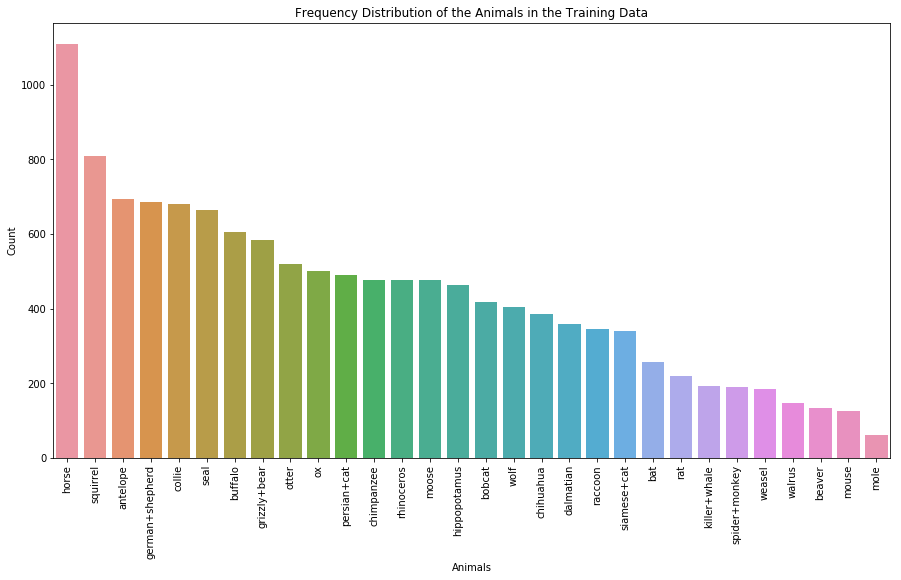

In [8]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=animal_count.index, y=animal_count.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
ax.set_title('Frequency Distribution of the Animals in the Training Data')
ax.set(xlabel='Animals', ylabel='Count')
plt.show()

From the above distribution, we can infer that the animal 'horse' have the largest number of images in the dataset while 'mole' has the least number of images.

The distribution of the animals is skewed i.e. the classes to predict are unbalanced in the dataset.

For Solving the problem of unbalanced classes we may either use undersampling or oversampling but here if we use undersampling then training data will become very less so we will use oversamling.
For doing oversampling we will simply copy the classes having having less instances as many times so the number of instances become equal in all the classes

In [10]:
### Checking for any null values in the labels 
labels  =  train.Animal
labels.isnull().any()

False

As we can see there are no missing labels in training data

## Data Preprocessing

In [11]:
import os, shutil # importing libraries the to do some file operations on os level

In [12]:
os.getcwd()

'/home/parmardiwakar150/Downloads/dl_challange'

In [13]:
original_dataset_dir = os.path.join(os.getcwd(), 'train')

In [14]:
original_dataset_dir

'/home/parmardiwakar150/Downloads/dl_challange/train'

In [15]:
train_dir = os.path.join(os.getcwd(),'Dataset/train')

In [16]:
os.mkdir(train_dir)

In [20]:
validation_dir = os.path.join(os.getcwd(), 'Dataset/valid')

In [21]:
os.mkdir(validation_dir)

In [22]:
file_names = list(train.Image_id.values)

In [23]:
label_names = list(train.Animal.values)

In [24]:
folders_to_be_created = np.unique(label_names)

In [25]:
for new_path in folders_to_be_created:
    if not os.path.exists(os.path.join(train_dir, new_path)):
        os.makedirs(os.path.join(train_dir, new_path))

In [26]:
for new_path in folders_to_be_created:
    if not os.path.exists(os.path.join(validation_dir, new_path)):
        os.makedirs(os.path.join(validation_dir, new_path))

We will keep 12000 images for training data and 1000 images for validation data

In [28]:
for f in range(12000):
    current_image = file_names[f]
    current_label = label_names[f]
    src = os.path.join(original_dataset_dir, current_image)
    dst = os.path.join(train_dir, current_label)
    shutil.move(src, dst) 

In [29]:
for f in range(12000, 13000):
    current_image = file_names[f]
    current_label = label_names[f]
    src = os.path.join(original_dataset_dir, current_image)
    dst = os.path.join(train_dir, current_label)
    shutil.move(src, dst) 

In [30]:
print(os.listdir(train_dir))

['german+shepherd', 'ox', 'mouse', 'wolf', 'hippopotamus', 'persian+cat', 'siamese+cat', 'moose', 'bobcat', 'buffalo', 'squirrel', 'otter', 'rat', 'weasel', 'mole', 'grizzly+bear', 'chihuahua', 'dalmatian', 'collie', 'seal', 'walrus', 'killer+whale', 'chimpanzee', 'beaver', 'horse', 'antelope', 'bat', 'rhinoceros', 'spider+monkey', 'raccoon']


## Preparing First Model

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

/home/parmardiwakar150/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(30, activation='softmax'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [34]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

In [35]:
from keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

In [37]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=50,
                                                    class_mode='categorical')

Found 13000 images belonging to 30 classes.


In [39]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=50,
                                                       class_mode='categorical')

Found 0 images belonging to 30 classes.


In [39]:
from keras.applications import VGG16

In [40]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [41]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [42]:
from keras.applications import VGG19

In [43]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [44]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [46]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 50

In [47]:
def extract_features_train(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 30))
    generator = train_datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,
                                            class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels, generator.class_indices

In [48]:
def extract_features_val(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 30))
    generator = test_datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,
                                            class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels, generator.class_indices

In [50]:
train_features, train_labels, _ = extract_features_train(train_dir, 11499)

Found 11499 images belonging to 30 classes.


In [51]:
validation_features, validation_labels, class_indices = extract_features_val(validation_dir, 1500)

Found 1500 images belonging to 30 classes.


In [52]:
class_indices

{'antelope': 0,
 'bat': 1,
 'beaver': 2,
 'bobcat': 3,
 'buffalo': 4,
 'chihuahua': 5,
 'chimpanzee': 6,
 'collie': 7,
 'dalmatian': 8,
 'german+shepherd': 9,
 'grizzly+bear': 10,
 'hippopotamus': 11,
 'horse': 12,
 'killer+whale': 13,
 'mole': 14,
 'moose': 15,
 'mouse': 16,
 'otter': 17,
 'ox': 18,
 'persian+cat': 19,
 'raccoon': 20,
 'rat': 21,
 'rhinoceros': 22,
 'seal': 23,
 'siamese+cat': 24,
 'spider+monkey': 25,
 'squirrel': 26,
 'walrus': 27,
 'weasel': 28,
 'wolf': 29}

In [76]:
train_features.shape

(11499, 8192)

In [53]:
train_features = np.reshape(train_features, (11499, 4 * 4 * 512))

In [54]:
validation_features = np.reshape(validation_features, (1500, 4 * 4 * 512))

In [284]:
from keras.layers import BatchNormalization

In [285]:
model = Sequential()

In [288]:
model.add(BatchNormalization(input_shape = train_features.shape[1:]))

In [289]:
from keras import layers, regularizers

In [290]:
model.add(Dense(256, activation='relu', input_dim=4 * 4 * 512))

In [291]:
#model.add(Dense(512, activation='relu'))

In [292]:
#model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(10)))

In [293]:
from keras.layers import Dropout

In [294]:
model.add(Dropout(0.5))

In [295]:
model.add(Dense(30, activation='softmax', input_dim=4 * 4 * 512))

In [296]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=2e-5), metrics=['acc'])

In [297]:
from keras.callbacks import EarlyStopping

In [298]:
history = model.fit(train_features, train_labels, epochs=50, batch_size=50,
                    validation_data=(validation_features, validation_labels))

Train on 11499 samples, validate on 1500 samples
Epoch 1/50
11499/11499 [==============================] - 14s 1ms/step - loss: 3.9921 - acc: 0.0750 - val_loss: 3.0336 - val_acc: 0.2093
Epoch 2/50
11499/11499 [==============================] - 14s 1ms/step - loss: 3.2092 - acc: 0.1809 - val_loss: 2.5848 - val_acc: 0.3133
Epoch 3/50
11499/11499 [==============================] - 13s 1ms/step - loss: 2.7946 - acc: 0.2618 - val_loss: 2.3666 - val_acc: 0.3633
Epoch 4/50
11499/11499 [==============================] - 16s 1ms/step - loss: 2.5562 - acc: 0.3101 - val_loss: 2.2277 - val_acc: 0.3940
Epoch 5/50
11499/11499 [==============================] - 12s 1ms/step - loss: 2.3669 - acc: 0.3468 - val_loss: 2.1350 - val_acc: 0.4087
Epoch 6/50
11499/11499 [==============================] - 11s 994us/step - loss: 2.1964 - acc: 0.3918 - val_loss: 2.0746 - val_acc: 0.4200
Epoch 7/50
11499/11499 [==============================] - 12s 1ms/step - loss: 2.0836 - acc: 0.4172 - val_loss: 2.0271 - val_ac

In [51]:
model.save('model.h5')

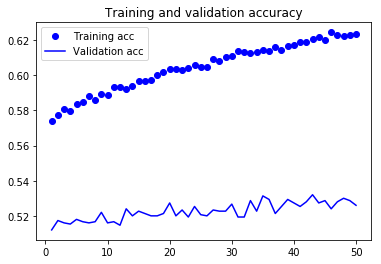

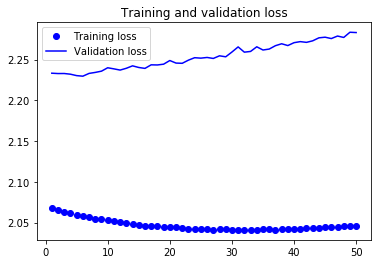

In [238]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [239]:
from keras.preprocessing.image import load_img, img_to_array

In [240]:
img = load_img('Dataset/test/Img-' + str(1) + '.jpg', target_size=(150, 150))

In [241]:
x = img_to_array(img) / 255

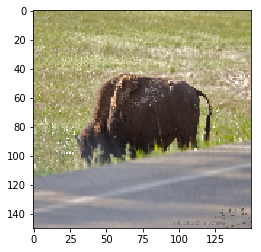

In [242]:
plt.imshow(x)

In [243]:
x = x.reshape((1,) + x.shape)

In [244]:
model.predict((conv_base.predict(x)).reshape(1, 4 * 4 * 512))

array([[0.02045187, 0.00412843, 0.00853864, 0.00429083, 0.30247483,
        0.00179195, 0.02777379, 0.01079546, 0.00965514, 0.0045532 ,
        0.03719239, 0.31800827, 0.0375793 , 0.02363227, 0.00199458,
        0.00959785, 0.00579583, 0.00834668, 0.05527494, 0.00206551,
        0.01399946, 0.00551972, 0.0409199 , 0.02108124, 0.00348488,
        0.00293768, 0.00362919, 0.00726734, 0.00492253, 0.00229631]],
      dtype=float32)

In [245]:
def load_image(img_path, target_size=(150, 150)):
    im = load_image(img_path, target_size=target_size)
    return img_to_array(im) #converts image to numpy array


In [246]:
os.getcwd()

'/home/parmardiwakar150/Downloads/DL Challange'

In [247]:
a = load_image('Dataset/test/')

RecursionError: maximum recursion depth exceeded

In [64]:
prediction = []
for i in range(1, 6001):
    img = load_img('Dataset/test/Img-' + str(i) + '.jpg', target_size=(150, 150))
    x = img_to_array(img) / 255
    x = x.reshape((1,) + x.shape)
    prediction.append(model.predict((conv_base.predict(x)).reshape(1, 4 * 4 * 512)))

In [65]:
prediction = pd.DataFrame(np.array(prediction).reshape(6000, 30))

In [66]:
prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000018,0.000002,0.000005,0.000003,0.986339,0.000004,0.000036,0.000042,0.000006,0.000042,...,0.000086,0.000059,0.004234,0.000248,0.000002,0.000002,0.000015,0.000049,0.000004,0.000009
1,0.000454,0.032678,0.005983,0.024182,0.014685,0.027963,0.012374,0.007412,0.001140,0.004724,...,0.048023,0.043693,0.039713,0.004868,0.280552,0.014324,0.045640,0.002639,0.033134,0.056954
2,0.006967,0.002485,0.016225,0.024405,0.079230,0.003280,0.018902,0.026660,0.002786,0.014456,...,0.041114,0.008127,0.028768,0.009526,0.001876,0.023243,0.030368,0.001523,0.046982,0.022945
3,0.001903,0.008545,0.000355,0.000365,0.000260,0.301398,0.033575,0.036028,0.000192,0.005991,...,0.002508,0.047714,0.000257,0.003834,0.009006,0.027485,0.136010,0.000214,0.037668,0.001222
4,0.000536,0.051144,0.002704,0.008976,0.000755,0.078117,0.016409,0.008866,0.002265,0.018636,...,0.055142,0.096515,0.000895,0.006669,0.356056,0.155670,0.021728,0.002080,0.008225,0.003361


In [67]:
classes = {}
for key, value in class_indices.items():
    classes[value] = key

In [68]:
col_ = []
for key, value in classes.items():
    col_.append(value)

In [69]:
col_

['antelope',
 'bat',
 'beaver',
 'bobcat',
 'buffalo',
 'chihuahua',
 'chimpanzee',
 'collie',
 'dalmatian',
 'german+shepherd',
 'grizzly+bear',
 'hippopotamus',
 'horse',
 'killer+whale',
 'mole',
 'moose',
 'mouse',
 'otter',
 'ox',
 'persian+cat',
 'raccoon',
 'rat',
 'rhinoceros',
 'seal',
 'siamese+cat',
 'spider+monkey',
 'squirrel',
 'walrus',
 'weasel',
 'wolf']

In [70]:
prediction.columns = col_

In [71]:
prediction.index.name = 'image_id'

In [72]:
image_id = []
for i in range(1, 6001):
    image_id.append('Img-' + str(i) + '.jpg')

In [73]:
prediction.index = image_id

In [74]:
prediction.index.name = 'image_id'

In [75]:
prediction['image_id'] = image_id

In [76]:
prediction = prediction[['image_id', 'antelope', 'bat', 'beaver', 'bobcat', 'buffalo', 'chihuahua',
       'chimpanzee', 'collie', 'dalmatian', 'german+shepherd', 'grizzly+bear',
       'hippopotamus', 'horse', 'killer+whale', 'mole', 'moose', 'mouse',
       'otter', 'ox', 'persian+cat', 'raccoon', 'rat', 'rhinoceros', 'seal',
       'siamese+cat', 'spider+monkey', 'squirrel', 'walrus', 'weasel', 'wolf']]

In [77]:
prediction.head()

,image_id,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,...,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
image_id,,,,,,,,,,,,,,,,,,,,,
Img-1.jpg,Img-1.jpg,0.000018,0.000002,0.000005,0.000003,0.986339,0.000004,0.000036,0.000042,0.000006,...,0.000086,0.000059,0.004234,0.000248,0.000002,0.000002,0.000015,0.000049,0.000004,0.000009
Img-2.jpg,Img-2.jpg,0.000454,0.032678,0.005983,0.024182,0.014685,0.027963,0.012374,0.007412,0.001140,...,0.048023,0.043693,0.039713,0.004868,0.280552,0.014324,0.045640,0.002639,0.033134,0.056954
Img-3.jpg,Img-3.jpg,0.006967,0.002485,0.016225,0.024405,0.079230,0.003280,0.018902,0.026660,0.002786,...,0.041114,0.008127,0.028768,0.009526,0.001876,0.023243,0.030368,0.001523,0.046982,0.022945
Img-4.jpg,Img-4.jpg,0.001903,0.008545,0.000355,0.000365,0.000260,0.301398,0.033575,0.036028,0.000192,...,0.002508,0.047714,0.000257,0.003834,0.009006,0.027485,0.136010,0.000214,0.037668,0.001222
Img-5.jpg,Img-5.jpg,0.000536,0.051144,0.002704,0.008976,0.000755,0.078117,0.016409,0.008866,0.002265,...,0.055142,0.096515,0.000895,0.006669,0.356056,0.155670,0.021728,0.002080,0.008225,0.003361


In [79]:
prediction.to_csv('model_regularised4_submission.csv', index=False)

In [268]:
prediction = pd.read_csv('model_regularised1_submission.csv')

In [269]:
prediction.columns

Index(['image_id', 'antelope', 'bat', 'beaver', 'bobcat', 'buffalo',
       'chihuahua', 'chimpanzee', 'collie', 'dalmatian', 'german+shepherd',
       'grizzly+bear', 'hippopotamus', 'horse', 'killer+whale', 'mole',
       'moose', 'mouse', 'otter', 'ox', 'persian+cat', 'raccoon', 'rat',
       'rhinoceros', 'seal', 'siamese+cat', 'spider+monkey', 'squirrel',
       'walrus', 'weasel', 'wolf'],
      dtype='object')

In [255]:
a = prediction[['antelope', 'bat', 'beaver', 'bobcat', 'buffalo',
       'chihuahua', 'chimpanzee', 'collie', 'dalmatian', 'german+shepherd',
       'grizzly+bear', 'hippopotamus', 'killer+whale', 'mole',
       'moose', 'mouse', 'otter', 'ox', 'persian+cat', 'raccoon', 'rat',
       'rhinoceros', 'seal', 'siamese+cat', 'spider+monkey', 'squirrel',
       'walrus', 'weasel', 'wolf']] = 0

In [265]:
for col in prediction.columns:
    if col == 'horse' or col =='image_id':
        pass
    else:
        prediction[col] = 0

In [266]:
prediction.to_csv('all_horse.csv', index=False)

In [267]:
prediction.head()

,image_id,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,...,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,Img-1.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Img-2.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Img-3.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Img-4.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Img-5.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
train.Animal.value_counts().values

array([1111,  808,  695,  687,  680,  665,  606,  583,  519,  501,  491,
        477,  477,  476,  464,  418,  403,  386,  359,  346,  341,  256,
        220,  193,  189,  184,  148,  133,  124,   60])

In [277]:
train.Animal.value_counts()['horse']

1111

In [279]:
for col in train.Animal.value_counts().index:
    if col in prediction.columns:
        prediction[col] = train.Animal.value_counts()[col] / 13000

In [280]:
prediction.head()

,image_id,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,...,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,Img-1.jpg,0.053462,0.019692,0.010231,0.032154,0.046615,0.029692,0.036692,0.052308,0.027615,...,0.026615,0.016923,0.036692,0.051154,0.026231,0.014538,0.062154,0.011385,0.014154,0.031
1,Img-2.jpg,0.053462,0.019692,0.010231,0.032154,0.046615,0.029692,0.036692,0.052308,0.027615,...,0.026615,0.016923,0.036692,0.051154,0.026231,0.014538,0.062154,0.011385,0.014154,0.031
2,Img-3.jpg,0.053462,0.019692,0.010231,0.032154,0.046615,0.029692,0.036692,0.052308,0.027615,...,0.026615,0.016923,0.036692,0.051154,0.026231,0.014538,0.062154,0.011385,0.014154,0.031
3,Img-4.jpg,0.053462,0.019692,0.010231,0.032154,0.046615,0.029692,0.036692,0.052308,0.027615,...,0.026615,0.016923,0.036692,0.051154,0.026231,0.014538,0.062154,0.011385,0.014154,0.031
4,Img-5.jpg,0.053462,0.019692,0.010231,0.032154,0.046615,0.029692,0.036692,0.052308,0.027615,...,0.026615,0.016923,0.036692,0.051154,0.026231,0.014538,0.062154,0.011385,0.014154,0.031


In [281]:
prediction.to_csv('as_train.csv', index=False)